# ✔️ Problem Formulation:
**The problem: ❎**

One of the biggest problems when people prepare to post a new listing on airbnb is, how much should one ask for? So in this assignmen,tbuild neural network model model to predict the listing price based on the listing characteristics.

**What is the input? ⏩**

dataset contains listings of different areas in Montreal during 2019.
summary for this real estate and its image.

**What is the output? ⏪**

Predict the type of this real estate and its price.

**What data mining function is required? 🤔**

-Multi Classification methods.
-Lemmatizer function.
-load images function.
-the data mining function required to text preprocessing is tokenization and vectorization each text.

**What could be the challenges? ⛏**


*   train data set include 301 null values in summary column.

*   The summary column includes values which are in different languages, So we need to tranlate all values into english.

*  clean text and using lemmatization method.
*  preprocessing image columns.
*  build different models and train it, that is take a lot of time.
*  multi-prediction problem.
*  dealing with transfer learning.




**What is the impact? 😀**

-Predict the price and the type of place by summary and image of place.

-This prediction can be useful in the case of buying and selling because it sets appropriate prices

**What is an ideal solution?**✊

The last trail when using Transfer learning Using (VGG model).  
this method has faster training speed, fewer training samples per time
This Trail Get Score on Kaggle (0.67527) (no. epoch =5)
The score without Lammatization (0.67934) (no. epoch =10)

On the other hand, its main disadvantage is that it is very slow to train if trained from scratch. Even on a decent GPU.

# Experimental protocol 💻
-Import some modules to dealing with data set

-load dataset from CSV file

-Data Exploration 

-Preparations (Check the data if it's Clean or not and clean it if it's not chean)
- Text cleaning
*   translator.
*   lemmatization method.
-Data Preprocessing 
*   Image data: resize
*   Text data: tokenization and converting to integer IDs

-building models (seven trail) 


1.   Using Conv2d layer (Multi-modality learning with Multi-objective learning )
2.   Using LSTM and Droupout layer (Multi-modality learning with Multi-objective learning )
3.   Using BiDirectional layer and GRU layer (Multi-modality learning with Multi-objective learning )
4.   Using LSTM (Multi-modality learning and Single task)
5.   Using LSTM layer (Multi-objective learning (multi-task)(predicting both price and type)
6.   Using Conv2d layer. (Multi-objective learning (multi-task))
7.   Transfer learning (VGG model) (Multi-modality learning with Multi-objective learning)
-Model Training
-Predition
-Create Submit file and check the score of each model on kaggle.

# Import some modules to dealing with data set ▶

**loading all relevant modules and setting some options:**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #visualizations 
import seaborn as sns
from tqdm.notebook import tqdm

#For dealing with text related tasks, we will be using nltk. The terrific scikit-learn library will be used to handle tasks related to machine learning.
import nltk 

#nlp
import re
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#load dataset from CSV file ⏬

In [ ]:
#to load the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read dataset into files 
train= pd.read_csv('/content/drive/MyDrive/train_xy.csv') #train dataset
test= pd.read_csv('/content/drive/MyDrive/test_x.csv') #test dataset

#Data Exploration 🔍


In [ ]:
#display the train set
train.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
#display the first three row of the test set
test.head(3)

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg


In [ ]:
print(train.shape)
print(test.shape)

(7627, 4)
(7360, 3)


#Data Preparations

In [ ]:
#check the null values (train set)
train.isnull().sum()


summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
#check the null values (test set)
test.isnull().sum()


id         0
summary    0
image      0
dtype: int64

There are 301 null values in summary column in train data set. 
we should dealing with it.

In [ ]:
#Drop null values which in summary column in train data
train.dropna()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [ ]:
#check the number of duplicated rows (train data)
train.duplicated().sum()


0

In [ ]:
#check the number of duplicated rows (test data)
test.duplicated().sum()


0

There is No duplication

# Text Cleaning ☺

The summary column includes values ​​written in different languages, So we need to translate it into english.

In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=cd159b9d29ddd4aa2049c2cf160b32d903950603172ebba52771fbedda2517fd
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [ ]:
#Using google translate to translate the column values
from googletrans import Translator
translator = Translator()
train.summary = train.summary.apply(lambda x: translator.translate(x, dest='en').text) # translate the summary column to English (train_data)
test.summary = test.summary.apply(lambda x: translator.translate(x, dest='en').text)  # translate the summary column to English (test_data)

In [ ]:
#display the train dataset
train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Pretty and cozy accommodation 10 minutes from ...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Very large ''rustic'' and very pleasant apartm...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"A large 4 and 1/2 apartment, all inclusive, we...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


As we can see a summary column has translate into English 😀

For dealing with text related tasks, we will be using nltk. The terrific scikit-learn library will be used to handle tasks related to machine learning.


In [ ]:
import nltk
nltk.download('wordnet')

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The `clean_text` function takes a string input and applies a bunch of manipulations to it (described in the code).

In [ ]:
stop_words = set(stopwords.words("english"))
def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    # match one or more white sepace
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    # match <any num of words>
    RE_TAGS = re.compile(r"<.*?>")
    # match any word with word boundary
    RE_SINGLECHAR = re.compile(r"\b^[^A-Za-zÀ-ž0-9]+\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        # match any word and any punctuation with word boundary.
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    #remove <any num of words>
    text = re.sub(RE_TAGS, " ", text)
    #remove any word with word boundary
    text = re.sub(RE_SINGLECHAR, " ", text)
    #remove one or more white sepace
    text = re.sub(RE_WSPACE, " ", text)

    
    word_tokens = word_tokenize(text)

    return word_tokens

The `lemma_clean` function

In [ ]:
def lemma_clean(text, for_embedding=False):
  lemmatizer = WordNetLemmatizer()
  word_tokens = clean_text(text, for_embedding)
  ''' steps:
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and lemmatize
    '''

  if for_embedding:
    # no lemmatization, lowering and punctuation / stop words removal
    words_filtered = word_tokens
  else:
    words_tokens_lower = [word.lower() for word in word_tokens]

    words_filtered = [lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words]

    text_clean = " ".join(words_filtered)
    return text_clean

we can improve model performance again by increasing the number of relevant data points.
Let's apply this to our data:

In [ ]:
train["summary"] = train.loc[train["summary"].str.len() > 20, "summary"]
test["summary"] = test.loc[test["summary"].str.len() > 20, "summary"]

# Preprocessing Summary Column with Lemmatizing

In [ ]:
# Clean text (train set)
#clean text with lemmatizing each word in the text 
#(lemmatizing will remove any word ending with take in consideration the meaning of the word).
train['summary']=train['summary'].map(lambda x: lemma_clean(x, for_embedding=False) if isinstance(x, str) else x)

In [ ]:
# Clean text (test set)
#clean text with lemmatizing each word in the text 
#(lemmatizing will remove any word ending with take in consideration the meaning of the word).
test['summary']=test['summary'].map(lambda x: lemma_clean(x, for_embedding=False) if isinstance(x, str) else x)

Let's encode the prediction labels and calculate the total number 
of unique labels. After, lets split the dataset into training set and testing set.

In [ ]:
from sklearn.model_selection import train_test_split

#convert labels to categories
train['type'] = train.type.astype('category').cat.codes
len_type = len(train.type.unique())
len_price = len(train.price.unique())
# get the total number of unique outputs (later used for prediction)
# split data (training/validation set)
X, Y = train_test_split(train, test_size=0.2, random_state=20)

In [ ]:
# loading summary: (force convert some of the non-string cell to string)
x_train_text = train.summary.astype('str')

## Data Preprocessing 🧹

We have image and text data. 
- Image data: resize each image and put its value in numpy array.
- Text data: tokenization and converting to integer IDs.


# preprocessing on image column

we need to resize values in the image column 

In [ ]:
# preprocess image data
#function to preprocss the image
# resize the image

import os
from PIL import Image
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64)) #resize image
        arr = np.array(image)
    except:
        #if the file doesn't exsit store array of zeros
        arr = np.zeros((64, 64, 2))
    return arr

In [ ]:
#display image column 
train['image']

0          img_train/0.jpg
1          img_train/1.jpg
2          img_train/2.jpg
3          img_train/3.jpg
4          img_train/4.jpg
               ...        
7622    img_train/7626.jpg
7623    img_train/7627.jpg
7624    img_train/7628.jpg
7625    img_train/7629.jpg
7626    img_train/7630.jpg
Name: image, Length: 7627, dtype: object

In [ ]:
# loading images:
x_train_image = np.array([load_image('/content/drive/MyDrive/copy-of-cisc-873-dm-w23-a4.zip (Unzipped Files)/a4/'+str(i)) for i in tqdm(train['image'])])
x_test_image = np.array([load_image('/content/drive/MyDrive/copy-of-cisc-873-dm-w23-a4.zip (Unzipped Files)/a4/'+str(i)) for i in tqdm(test['image'])])


  0%|          | 0/7627 [00:00<?, ?it/s]

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# Definig the labels
y_train_price = train['price'] # get price
y_train_type = train['type'] # get type 


(7627, 64, 64, 2)

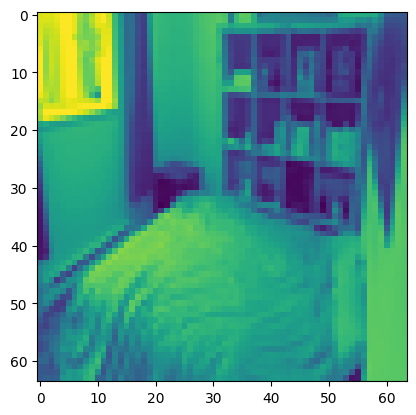

In [ ]:
# check image loading
plt.imshow(x_train_image[50, :, :, 0])
x_train_image.shape

In [ ]:
# preprocess text data
#tokenize each text and then give token a unique id.


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint

vocab_size = 40000
max_len = 100


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
    

# padding is done inside: 
x_train_text_id = _preprocess(x_train_text)

print(x_train_text_id.shape)

(7627, 100)


In [ ]:
# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test.summary.astype('str'))

In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_text_id[:5]))

['spacious sunny and cozy modern apartment in the heart of montreal this 3 '
 'bedroom centrally located in the very popular plateau mont royal '
 'neighborhood in the middle of prince arthur pedestrian only street close to '
 'all amenities restaurants coffee house bars clubs shopping universities '
 'subway stations experience montreal like a real local resident be in the '
 'heart of the action grand prix week grill saint laurent festival mural 2019 '
 'and so much more',
 'located in one of the most vibrant and accessible locations of downtown '
 'montreal this one bedroom condo will not only impress you but leave you with '
 'one of the most memorable experiences it is walking distance of the popular '
 'sainte catherine street the bell center the old port lachine canal '
 'bonaventure metro and much much more',
 'pretty and cozy accommodation 10 minutes from downtown montreal grocery '
 'store pharmacy saq restaurants and public transport nearby two closed '
 'bedrooms that can a

In [ ]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


## Building a Deep learing models

#First Trail

**Multi-modality learning with Multi-objective learning**


*   Multi-modality learning with multi-objective learning can be more versatile and comprehensive, as it can combine the benefits of both approaches and handle complex problems that involve multiple input data sources and multiple output tasks. However, it may also face some challenges, such as designing a suitable model architecture that can fuse and optimize multiple modalities and tasks, tuning the hyperparameters and loss functions for each modality and task, and evaluating the performance and trade-offs of the model.
*   It's take summary and image as an input and predict price and type as output.







# Using Conv2d layer.

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.


a Conv2D layer can be used to process the image data, but not the text data. Text data is usually represented as a sequence of tokens or characters, which does not have a spatial structure that can be exploited by a Conv2D layer. A better choice for text data would be an embedding layer, which can map the tokens or characters to a high-dimensional vector space, followed by a recurrent or attention layer, which can capture the sequential dependencies and semantics of the text.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam


# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d. you can change it to anything else as needed
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:

history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
382/382 [==============================] - ETA: 0s - loss: 21.9245 - price_loss: 20.4631 - type_loss: 23.3860 - price_sparse_categorical_accuracy: 0.4883 - type_sparse_categorical_accuracy: 0.5797

382/382 [==============================] - 50s 99ms/step - loss: 21.9245 - price_loss: 20.4631 - type_loss: 23.3860 - price_sparse_categorical_accuracy: 0.4883 - type_sparse_categorical_accuracy: 0.5797 - val_loss: 6.9047 - val_price_loss: 4.5866 - val_type_loss: 9.2229 - val_price_sparse_categorical_accuracy: 0.4725 - val_type_sparse_categorical_accuracy: 0.6913
Epoch 2/20
382/382 [==============================] - ETA: 0s - loss: 6.7772 - price_loss: 5.0646 - type_loss: 8.4897 - price_sparse_categorical_accuracy: 0.5150 - type_sparse_categorical_accuracy: 0.5843

382/382 [==============================] - 11s 28ms/step - loss: 6.7772 - price_loss: 5.0646 - type_loss: 8.4897 - price_sparse_categorical_accuracy: 0.5150 - type_sparse_categorical_accuracy: 0.5843 - val_loss: 34.3715 - val_price_loss: 40.1444 - val_type_loss: 28.5986 - val_price_sparse_categorical_accuracy: 0.1239 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/20
382/382 [==============================] - ETA: 0s - loss: 9.0852 - price_loss: 6.2913 - type_loss: 11.8792 - price_sparse_categorical_accuracy: 0.5099 - type_sparse_categorical_accuracy: 0.5873

382/382 [==============================] - 5s 14ms/step - loss: 9.0852 - price_loss: 6.2913 - type_loss: 11.8792 - price_sparse_categorical_accuracy: 0.5099 - type_sparse_categorical_accuracy: 0.5873 - val_loss: 5.8661 - val_price_loss: 4.5204 - val_type_loss: 7.2118 - val_price_sparse_categorical_accuracy: 0.5131 - val_type_sparse_categorical_accuracy: 0.6887
Epoch 4/20
382/382 [==============================] - ETA: 0s - loss: 5.7391 - price_loss: 4.1716 - type_loss: 7.3066 - price_sparse_categorical_accuracy: 0.5483 - type_sparse_categorical_accuracy: 0.5911

382/382 [==============================] - 4s 11ms/step - loss: 5.7391 - price_loss: 4.1716 - type_loss: 7.3066 - price_sparse_categorical_accuracy: 0.5483 - type_sparse_categorical_accuracy: 0.5911 - val_loss: 5.0698 - val_price_loss: 3.7275 - val_type_loss: 6.4122 - val_price_sparse_categorical_accuracy: 0.4961 - val_type_sparse_categorical_accuracy: 0.4364
Epoch 5/20
382/382 [==============================] - ETA: 0s - loss: 7.0335 - price_loss: 5.3163 - type_loss: 8.7506 - price_sparse_categorical_accuracy: 0.5512 - type_sparse_categorical_accuracy: 0.6019

382/382 [==============================] - 6s 17ms/step - loss: 7.0335 - price_loss: 5.3163 - type_loss: 8.7506 - price_sparse_categorical_accuracy: 0.5512 - type_sparse_categorical_accuracy: 0.6019 - val_loss: 14.1170 - val_price_loss: 6.5978 - val_type_loss: 21.6361 - val_price_sparse_categorical_accuracy: 0.6003 - val_type_sparse_categorical_accuracy: 0.3211
Epoch 6/20
382/382 [==============================] - ETA: 0s - loss: 6.6453 - price_loss: 4.4469 - type_loss: 8.8436 - price_sparse_categorical_accuracy: 0.5684 - type_sparse_categorical_accuracy: 0.6060

382/382 [==============================] - 3s 9ms/step - loss: 6.6453 - price_loss: 4.4469 - type_loss: 8.8436 - price_sparse_categorical_accuracy: 0.5684 - type_sparse_categorical_accuracy: 0.6060 - val_loss: 6.7575 - val_price_loss: 4.4133 - val_type_loss: 9.1018 - val_price_sparse_categorical_accuracy: 0.6081 - val_type_sparse_categorical_accuracy: 0.3283
Epoch 7/20
382/382 [==============================] - ETA: 0s - loss: 16.2338 - price_loss: 10.2472 - type_loss: 22.2203 - price_sparse_categorical_accuracy: 0.5465 - type_sparse_categorical_accuracy: 0.5932

382/382 [==============================] - 4s 9ms/step - loss: 16.2338 - price_loss: 10.2472 - type_loss: 22.2203 - price_sparse_categorical_accuracy: 0.5465 - type_sparse_categorical_accuracy: 0.5932 - val_loss: 34.1651 - val_price_loss: 21.0122 - val_type_loss: 47.3180 - val_price_sparse_categorical_accuracy: 0.6258 - val_type_sparse_categorical_accuracy: 0.4535
Epoch 8/20
382/382 [==============================] - ETA: 0s - loss: 7.7085 - price_loss: 4.5116 - type_loss: 10.9055 - price_sparse_categorical_accuracy: 0.5917 - type_sparse_categorical_accuracy: 0.6265

382/382 [==============================] - 5s 14ms/step - loss: 7.7085 - price_loss: 4.5116 - type_loss: 10.9055 - price_sparse_categorical_accuracy: 0.5917 - type_sparse_categorical_accuracy: 0.6265 - val_loss: 5.2347 - val_price_loss: 3.9136 - val_type_loss: 6.5557 - val_price_sparse_categorical_accuracy: 0.5806 - val_type_sparse_categorical_accuracy: 0.5577
Epoch 9/20
382/382 [==============================] - ETA: 0s - loss: 4.9433 - price_loss: 3.3275 - type_loss: 6.5591 - price_sparse_categorical_accuracy: 0.6160 - type_sparse_categorical_accuracy: 0.6471

382/382 [==============================] - 3s 8ms/step - loss: 4.9433 - price_loss: 3.3275 - type_loss: 6.5591 - price_sparse_categorical_accuracy: 0.6160 - type_sparse_categorical_accuracy: 0.6471 - val_loss: 4.0304 - val_price_loss: 3.2177 - val_type_loss: 4.8431 - val_price_sparse_categorical_accuracy: 0.6271 - val_type_sparse_categorical_accuracy: 0.6894
Epoch 10/20
382/382 [==============================] - ETA: 0s - loss: 10.8519 - price_loss: 7.0583 - type_loss: 14.6455 - price_sparse_categorical_accuracy: 0.6127 - type_sparse_categorical_accuracy: 0.6324

382/382 [==============================] - 4s 10ms/step - loss: 10.8519 - price_loss: 7.0583 - type_loss: 14.6455 - price_sparse_categorical_accuracy: 0.6127 - type_sparse_categorical_accuracy: 0.6324 - val_loss: 6.3064 - val_price_loss: 4.6000 - val_type_loss: 8.0128 - val_price_sparse_categorical_accuracy: 0.4738 - val_type_sparse_categorical_accuracy: 0.7104
Epoch 11/20
382/382 [==============================] - ETA: 0s - loss: 6.2337 - price_loss: 4.0069 - type_loss: 8.4606 - price_sparse_categorical_accuracy: 0.6284 - type_sparse_categorical_accuracy: 0.6469

382/382 [==============================] - 4s 9ms/step - loss: 6.2337 - price_loss: 4.0069 - type_loss: 8.4606 - price_sparse_categorical_accuracy: 0.6284 - type_sparse_categorical_accuracy: 0.6469 - val_loss: 7.8470 - val_price_loss: 4.7143 - val_type_loss: 10.9797 - val_price_sparse_categorical_accuracy: 0.4830 - val_type_sparse_categorical_accuracy: 0.6763
Epoch 12/20
382/382 [==============================] - ETA: 0s - loss: 6.6637 - price_loss: 3.6491 - type_loss: 9.6783 - price_sparse_categorical_accuracy: 0.6348 - type_sparse_categorical_accuracy: 0.6455

382/382 [==============================] - 4s 11ms/step - loss: 6.6637 - price_loss: 3.6491 - type_loss: 9.6783 - price_sparse_categorical_accuracy: 0.6348 - type_sparse_categorical_accuracy: 0.6455 - val_loss: 6.2274 - val_price_loss: 4.2807 - val_type_loss: 8.1740 - val_price_sparse_categorical_accuracy: 0.4705 - val_type_sparse_categorical_accuracy: 0.7543
Epoch 13/20
382/382 [==============================] - ETA: 0s - loss: 6.2861 - price_loss: 3.9268 - type_loss: 8.6453 - price_sparse_categorical_accuracy: 0.6419 - type_sparse_categorical_accuracy: 0.6569

382/382 [==============================] - 3s 9ms/step - loss: 6.2861 - price_loss: 3.9268 - type_loss: 8.6453 - price_sparse_categorical_accuracy: 0.6419 - type_sparse_categorical_accuracy: 0.6569 - val_loss: 4.2370 - val_price_loss: 3.0278 - val_type_loss: 5.4461 - val_price_sparse_categorical_accuracy: 0.5747 - val_type_sparse_categorical_accuracy: 0.5911
Epoch 14/20
382/382 [==============================] - ETA: 0s - loss: 18.4082 - price_loss: 10.8825 - type_loss: 25.9338 - price_sparse_categorical_accuracy: 0.6051 - type_sparse_categorical_accuracy: 0.6291

382/382 [==============================] - 4s 9ms/step - loss: 18.4082 - price_loss: 10.8825 - type_loss: 25.9338 - price_sparse_categorical_accuracy: 0.6051 - type_sparse_categorical_accuracy: 0.6291 - val_loss: 7.4958 - val_price_loss: 5.5949 - val_type_loss: 9.3967 - val_price_sparse_categorical_accuracy: 0.4069 - val_type_sparse_categorical_accuracy: 0.6075
Epoch 15/20
382/382 [==============================] - ETA: 0s - loss: 7.5350 - price_loss: 3.9240 - type_loss: 11.1460 - price_sparse_categorical_accuracy: 0.6528 - type_sparse_categorical_accuracy: 0.6656

382/382 [==============================] - 3s 9ms/step - loss: 7.5350 - price_loss: 3.9240 - type_loss: 11.1460 - price_sparse_categorical_accuracy: 0.6528 - type_sparse_categorical_accuracy: 0.6656 - val_loss: 4.6241 - val_price_loss: 2.9987 - val_type_loss: 6.2494 - val_price_sparse_categorical_accuracy: 0.6429 - val_type_sparse_categorical_accuracy: 0.7353
Epoch 16/20
376/382 [============================>.] - ETA: 0s - loss: 5.7784 - price_loss: 3.6127 - type_loss: 7.9440 - price_sparse_categorical_accuracy: 0.6769 - type_sparse_categorical_accuracy: 0.6755

382/382 [==============================] - 3s 9ms/step - loss: 5.7758 - price_loss: 3.6059 - type_loss: 7.9458 - price_sparse_categorical_accuracy: 0.6764 - type_sparse_categorical_accuracy: 0.6766 - val_loss: 9.4011 - val_price_loss: 4.5577 - val_type_loss: 14.2446 - val_price_sparse_categorical_accuracy: 0.5138 - val_type_sparse_categorical_accuracy: 0.3761
Epoch 17/20
382/382 [==============================] - ETA: 0s - loss: 3.4117 - price_loss: 2.1391 - type_loss: 4.6843 - price_sparse_categorical_accuracy: 0.7081 - type_sparse_categorical_accuracy: 0.7061

382/382 [==============================] - 3s 8ms/step - loss: 3.4117 - price_loss: 2.1391 - type_loss: 4.6843 - price_sparse_categorical_accuracy: 0.7081 - type_sparse_categorical_accuracy: 0.7061 - val_loss: 4.0135 - val_price_loss: 2.7055 - val_type_loss: 5.3216 - val_price_sparse_categorical_accuracy: 0.6363 - val_type_sparse_categorical_accuracy: 0.6409
Epoch 18/20
382/382 [==============================] - ETA: 0s - loss: 3.1062 - price_loss: 1.9171 - type_loss: 4.2953 - price_sparse_categorical_accuracy: 0.7140 - type_sparse_categorical_accuracy: 0.7037

382/382 [==============================] - 3s 8ms/step - loss: 3.1062 - price_loss: 1.9171 - type_loss: 4.2953 - price_sparse_categorical_accuracy: 0.7140 - type_sparse_categorical_accuracy: 0.7037 - val_loss: 4.1969 - val_price_loss: 2.6886 - val_type_loss: 5.7052 - val_price_sparse_categorical_accuracy: 0.6127 - val_type_sparse_categorical_accuracy: 0.6940
Epoch 19/20
382/382 [==============================] - ETA: 0s - loss: 3.2896 - price_loss: 2.1716 - type_loss: 4.4077 - price_sparse_categorical_accuracy: 0.7017 - type_sparse_categorical_accuracy: 0.6945

382/382 [==============================] - 3s 7ms/step - loss: 3.2896 - price_loss: 2.1716 - type_loss: 4.4077 - price_sparse_categorical_accuracy: 0.7017 - type_sparse_categorical_accuracy: 0.6945 - val_loss: 4.0464 - val_price_loss: 2.6506 - val_type_loss: 5.4422 - val_price_sparse_categorical_accuracy: 0.6402 - val_type_sparse_categorical_accuracy: 0.6232
Epoch 20/20
374/382 [============================>.] - ETA: 0s - loss: 17.3401 - price_loss: 11.7398 - type_loss: 22.9404 - price_sparse_categorical_accuracy: 0.6551 - type_sparse_categorical_accuracy: 0.6653

382/382 [==============================] - 5s 12ms/step - loss: 17.2155 - price_loss: 11.5540 - type_loss: 22.8770 - price_sparse_categorical_accuracy: 0.6563 - type_sparse_categorical_accuracy: 0.6643 - val_loss: 20.8148 - val_price_loss: 5.1543 - val_type_loss: 36.4753 - val_price_sparse_categorical_accuracy: 0.6494 - val_type_sparse_categorical_accuracy: 0.3899


## Predition

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


230/230 [==============================] - 1s 2ms/step
[[9.9985480e-01 1.4517405e-04 1.1646709e-08]
 [9.9999976e-01 1.8438443e-07 1.9841703e-20]
 [9.9996817e-01 3.1853302e-05 1.3526767e-21]
 ...
 [1.0000000e+00 4.3763248e-12 1.9498581e-27]
 [1.0000000e+00 8.4636413e-09 5.4708873e-21]
 [1.0000000e+00 3.7933781e-09 4.9399984e-25]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted}
).to_csv('sample_submission1.csv', index=False)

This Trail Get Score on Kaggle (0.62826)

The Score without lemmatization (0.64782)

The model didn't overfit on the training dataset

#Secound Trail 

**Multi-modality learning with Multi-objective learning**


*   Multi-modality learning with multi-objective learning can be more versatile and comprehensive, as it can combine the benefits of both approaches and handle complex problems that involve multiple input data sources and multiple output tasks. However, it may also face some challenges, such as designing a suitable model architecture that can fuse and optimize multiple modalities and tasks, tuning the hyperparameters and loss functions for each modality and task, and evaluating the performance and trade-offs of the model.
*   It's take summary and image as an input and predict price and type as output.







# Using LSTM and Droupout layer

LSTM stands for Long-Short Term Memory. LSTM is a type of recurrent neural network but is better than traditional recurrent neural networks in terms of memory. Having a good hold over memorizing certain patterns LSTMs perform fairly better. As with every other NN, LSTM can have multiple hidden layers and as it passes through every layer, the relevant information is kept and all the irrelevant information gets discarded in every single cell.

LSTM has 3 main gates.

1. FORGET Gate
2. INPUT Gate
3. OUTPUT Gate

LSTMs efficiently improves performance by memorizing the relevant information that is important and finds the pattern

Dropout is a regularization technique that prevents neural networks from overfitting.

I think this model will be better than the pervious model

In [ ]:
from tensorflow.keras.layers import LSTM
from keras.layers.core import SpatialDropout1D,Dropout
from keras import regularizers



# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 250)(in_text)
spatial=SpatialDropout1D(0.2)(embedded)
lstm=LSTM(32,dropout=0.2,return_sequences=True)(spatial)
averaged = tf.reduce_mean(lstm, axis=1)

#images part
cov = Conv2D(32, (8, 8),activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer='he_uniform')(in_image)
pl = MaxPool2D(pool_size=(8, 8))(cov)#,strides=(1,1),padding='same')(cov) 
d1=Dropout(0.25)(pl)
cov2 = Conv2D(32, (4, 4),kernel_regularizer=regularizers.l2(0.01),activation='relu')(d1)
p2 = MaxPool2D((4, 4))(cov2)#,strides=(1,1),padding='same')(cov2)
d2=Dropout(0.25)(p2)
flattened = Flatten()(d2)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model2 = keras.Model(
    inputs={
        'summary': in_text,
            'image': in_image
            },
    outputs={
        'type': p_type,
        'price': p_price,
        },
    )

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model2.compile(
    optimizer=Adam(lr=0.01),
    loss={'type': 'sparse_categorical_crossentropy',
          'price': 'sparse_categorical_crossentropy'
          },
    loss_weights={
        'type': 0.7,
        'price': 0.3},
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
        },
    )


model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 57, 57, 32)   4128        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 7, 7, 32)    0           ['conv2d_2[0][0]']               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model2.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
382/382 [==============================] - ETA: 0s - loss: 7.0447 - price_loss: 5.8377 - type_loss: 6.5044 - price_sparse_categorical_accuracy: 0.5825 - type_sparse_categorical_accuracy: 0.6987

382/382 [==============================] - 53s 125ms/step - loss: 7.0447 - price_loss: 5.8377 - type_loss: 6.5044 - price_sparse_categorical_accuracy: 0.5825 - type_sparse_categorical_accuracy: 0.6987 - val_loss: 1.5915 - val_price_loss: 0.8117 - val_type_loss: 0.9372 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/20
382/382 [==============================] - ETA: 0s - loss: 1.5633 - price_loss: 0.8070 - type_loss: 0.9277 - price_sparse_categorical_accuracy: 0.6291 - type_sparse_categorical_accuracy: 0.7528

382/382 [==============================] - 15s 40ms/step - loss: 1.5633 - price_loss: 0.8070 - type_loss: 0.9277 - price_sparse_categorical_accuracy: 0.6291 - type_sparse_categorical_accuracy: 0.7528 - val_loss: 1.4966 - val_price_loss: 0.7783 - val_type_loss: 0.8712 - val_price_sparse_categorical_accuracy: 0.6363 - val_type_sparse_categorical_accuracy: 0.7667
Epoch 3/20
382/382 [==============================] - ETA: 0s - loss: 1.4435 - price_loss: 0.7759 - type_loss: 0.8205 - price_sparse_categorical_accuracy: 0.6532 - type_sparse_categorical_accuracy: 0.7651

382/382 [==============================] - 10s 27ms/step - loss: 1.4435 - price_loss: 0.7759 - type_loss: 0.8205 - price_sparse_categorical_accuracy: 0.6532 - type_sparse_categorical_accuracy: 0.7651 - val_loss: 1.4323 - val_price_loss: 0.7735 - val_type_loss: 0.8296 - val_price_sparse_categorical_accuracy: 0.6448 - val_type_sparse_categorical_accuracy: 0.7693
Epoch 4/20
382/382 [==============================] - ETA: 0s - loss: 1.3435 - price_loss: 0.7527 - type_loss: 0.7357 - price_sparse_categorical_accuracy: 0.6573 - type_sparse_categorical_accuracy: 0.7859

382/382 [==============================] - 10s 25ms/step - loss: 1.3435 - price_loss: 0.7527 - type_loss: 0.7357 - price_sparse_categorical_accuracy: 0.6573 - type_sparse_categorical_accuracy: 0.7859 - val_loss: 1.3870 - val_price_loss: 0.7497 - val_type_loss: 0.8235 - val_price_sparse_categorical_accuracy: 0.6533 - val_type_sparse_categorical_accuracy: 0.7713
Epoch 5/20
382/382 [==============================] - ETA: 0s - loss: 1.2151 - price_loss: 0.7025 - type_loss: 0.6225 - price_sparse_categorical_accuracy: 0.6941 - type_sparse_categorical_accuracy: 0.8263

382/382 [==============================] - 8s 22ms/step - loss: 1.2151 - price_loss: 0.7025 - type_loss: 0.6225 - price_sparse_categorical_accuracy: 0.6941 - type_sparse_categorical_accuracy: 0.8263 - val_loss: 1.3467 - val_price_loss: 0.7432 - val_type_loss: 0.8179 - val_price_sparse_categorical_accuracy: 0.6743 - val_type_sparse_categorical_accuracy: 0.7792
Epoch 6/20
382/382 [==============================] - ETA: 0s - loss: 1.0965 - price_loss: 0.6583 - type_loss: 0.5218 - price_sparse_categorical_accuracy: 0.7233 - type_sparse_categorical_accuracy: 0.8577

382/382 [==============================] - 5s 14ms/step - loss: 1.0965 - price_loss: 0.6583 - type_loss: 0.5218 - price_sparse_categorical_accuracy: 0.7233 - type_sparse_categorical_accuracy: 0.8577 - val_loss: 1.3532 - val_price_loss: 0.7370 - val_type_loss: 0.8800 - val_price_sparse_categorical_accuracy: 0.6743 - val_type_sparse_categorical_accuracy: 0.7700
Epoch 7/20
382/382 [==============================] - ETA: 0s - loss: 1.0047 - price_loss: 0.6170 - type_loss: 0.4582 - price_sparse_categorical_accuracy: 0.7463 - type_sparse_categorical_accuracy: 0.8779

382/382 [==============================] - 7s 19ms/step - loss: 1.0047 - price_loss: 0.6170 - type_loss: 0.4582 - price_sparse_categorical_accuracy: 0.7463 - type_sparse_categorical_accuracy: 0.8779 - val_loss: 1.3294 - val_price_loss: 0.7488 - val_type_loss: 0.8909 - val_price_sparse_categorical_accuracy: 0.6638 - val_type_sparse_categorical_accuracy: 0.7621
Epoch 8/20
382/382 [==============================] - ETA: 0s - loss: 0.9121 - price_loss: 0.5648 - type_loss: 0.3996 - price_sparse_categorical_accuracy: 0.7705 - type_sparse_categorical_accuracy: 0.8921

382/382 [==============================] - 6s 15ms/step - loss: 0.9121 - price_loss: 0.5648 - type_loss: 0.3996 - price_sparse_categorical_accuracy: 0.7705 - type_sparse_categorical_accuracy: 0.8921 - val_loss: 1.3388 - val_price_loss: 0.7654 - val_type_loss: 0.9497 - val_price_sparse_categorical_accuracy: 0.6684 - val_type_sparse_categorical_accuracy: 0.7641
Epoch 9/20
382/382 [==============================] - ETA: 0s - loss: 0.8262 - price_loss: 0.5181 - type_loss: 0.3495 - price_sparse_categorical_accuracy: 0.8005 - type_sparse_categorical_accuracy: 0.9080

382/382 [==============================] - 7s 19ms/step - loss: 0.8262 - price_loss: 0.5181 - type_loss: 0.3495 - price_sparse_categorical_accuracy: 0.8005 - type_sparse_categorical_accuracy: 0.9080 - val_loss: 1.3655 - val_price_loss: 0.8025 - val_type_loss: 1.0246 - val_price_sparse_categorical_accuracy: 0.6547 - val_type_sparse_categorical_accuracy: 0.7484
Epoch 10/20
382/382 [==============================] - ETA: 0s - loss: 0.7451 - price_loss: 0.4717 - type_loss: 0.3070 - price_sparse_categorical_accuracy: 0.8208 - type_sparse_categorical_accuracy: 0.9171

382/382 [==============================] - 5s 14ms/step - loss: 0.7451 - price_loss: 0.4717 - type_loss: 0.3070 - price_sparse_categorical_accuracy: 0.8208 - type_sparse_categorical_accuracy: 0.9171 - val_loss: 1.3901 - val_price_loss: 0.8892 - val_type_loss: 1.0773 - val_price_sparse_categorical_accuracy: 0.6356 - val_type_sparse_categorical_accuracy: 0.7484
Epoch 11/20
382/382 [==============================] - ETA: 0s - loss: 0.6714 - price_loss: 0.4327 - type_loss: 0.2734 - price_sparse_categorical_accuracy: 0.8374 - type_sparse_categorical_accuracy: 0.9271

382/382 [==============================] - 7s 18ms/step - loss: 0.6714 - price_loss: 0.4327 - type_loss: 0.2734 - price_sparse_categorical_accuracy: 0.8374 - type_sparse_categorical_accuracy: 0.9271 - val_loss: 1.3828 - val_price_loss: 0.8757 - val_type_loss: 1.1276 - val_price_sparse_categorical_accuracy: 0.6494 - val_type_sparse_categorical_accuracy: 0.7562
Epoch 12/20
382/382 [==============================] - ETA: 0s - loss: 0.6011 - price_loss: 0.3995 - type_loss: 0.2434 - price_sparse_categorical_accuracy: 0.8485 - type_sparse_categorical_accuracy: 0.9395

382/382 [==============================] - 6s 15ms/step - loss: 0.6011 - price_loss: 0.3995 - type_loss: 0.2434 - price_sparse_categorical_accuracy: 0.8485 - type_sparse_categorical_accuracy: 0.9395 - val_loss: 1.3428 - val_price_loss: 0.9381 - val_type_loss: 1.1010 - val_price_sparse_categorical_accuracy: 0.6566 - val_type_sparse_categorical_accuracy: 0.7569
Epoch 13/20
382/382 [==============================] - ETA: 0s - loss: 0.5351 - price_loss: 0.3708 - type_loss: 0.2185 - price_sparse_categorical_accuracy: 0.8602 - type_sparse_categorical_accuracy: 0.9441

382/382 [==============================] - 5s 14ms/step - loss: 0.5351 - price_loss: 0.3708 - type_loss: 0.2185 - price_sparse_categorical_accuracy: 0.8602 - type_sparse_categorical_accuracy: 0.9441 - val_loss: 1.4025 - val_price_loss: 1.0534 - val_type_loss: 1.1937 - val_price_sparse_categorical_accuracy: 0.6225 - val_type_sparse_categorical_accuracy: 0.7477
Epoch 14/20
382/382 [==============================] - ETA: 0s - loss: 0.4669 - price_loss: 0.3438 - type_loss: 0.1892 - price_sparse_categorical_accuracy: 0.8685 - type_sparse_categorical_accuracy: 0.9518

382/382 [==============================] - 7s 20ms/step - loss: 0.4669 - price_loss: 0.3438 - type_loss: 0.1892 - price_sparse_categorical_accuracy: 0.8685 - type_sparse_categorical_accuracy: 0.9518 - val_loss: 1.3700 - val_price_loss: 1.0365 - val_type_loss: 1.2103 - val_price_sparse_categorical_accuracy: 0.6494 - val_type_sparse_categorical_accuracy: 0.7516
Epoch 15/20
382/382 [==============================] - ETA: 0s - loss: 0.4122 - price_loss: 0.3215 - type_loss: 0.1750 - price_sparse_categorical_accuracy: 0.8753 - type_sparse_categorical_accuracy: 0.9562

382/382 [==============================] - 6s 17ms/step - loss: 0.4122 - price_loss: 0.3215 - type_loss: 0.1750 - price_sparse_categorical_accuracy: 0.8753 - type_sparse_categorical_accuracy: 0.9562 - val_loss: 1.3557 - val_price_loss: 1.0587 - val_type_loss: 1.2323 - val_price_sparse_categorical_accuracy: 0.6429 - val_type_sparse_categorical_accuracy: 0.7693
Epoch 16/20
382/382 [==============================] - ETA: 0s - loss: 0.3574 - price_loss: 0.2899 - type_loss: 0.1606 - price_sparse_categorical_accuracy: 0.8856 - type_sparse_categorical_accuracy: 0.9590

382/382 [==============================] - 7s 18ms/step - loss: 0.3574 - price_loss: 0.2899 - type_loss: 0.1606 - price_sparse_categorical_accuracy: 0.8856 - type_sparse_categorical_accuracy: 0.9590 - val_loss: 1.3884 - val_price_loss: 1.1715 - val_type_loss: 1.2800 - val_price_sparse_categorical_accuracy: 0.6350 - val_type_sparse_categorical_accuracy: 0.7615
Epoch 17/20
381/382 [============================>.] - ETA: 0s - loss: 0.3211 - price_loss: 0.2749 - type_loss: 0.1549 - price_sparse_categorical_accuracy: 0.8963 - type_sparse_categorical_accuracy: 0.9618

382/382 [==============================] - 5s 13ms/step - loss: 0.3210 - price_loss: 0.2747 - type_loss: 0.1550 - price_sparse_categorical_accuracy: 0.8964 - type_sparse_categorical_accuracy: 0.9618 - val_loss: 1.4474 - val_price_loss: 1.2346 - val_type_loss: 1.3645 - val_price_sparse_categorical_accuracy: 0.6298 - val_type_sparse_categorical_accuracy: 0.7471
Epoch 18/20
382/382 [==============================] - ETA: 0s - loss: 0.2781 - price_loss: 0.2404 - type_loss: 0.1371 - price_sparse_categorical_accuracy: 0.9092 - type_sparse_categorical_accuracy: 0.9644

382/382 [==============================] - 6s 14ms/step - loss: 0.2781 - price_loss: 0.2404 - type_loss: 0.1371 - price_sparse_categorical_accuracy: 0.9092 - type_sparse_categorical_accuracy: 0.9644 - val_loss: 1.4210 - val_price_loss: 1.2711 - val_type_loss: 1.3446 - val_price_sparse_categorical_accuracy: 0.6415 - val_type_sparse_categorical_accuracy: 0.7595
Epoch 19/20
380/382 [============================>.] - ETA: 0s - loss: 0.2462 - price_loss: 0.2211 - type_loss: 0.1309 - price_sparse_categorical_accuracy: 0.9183 - type_sparse_categorical_accuracy: 0.9661

382/382 [==============================] - 6s 15ms/step - loss: 0.2463 - price_loss: 0.2209 - type_loss: 0.1311 - price_sparse_categorical_accuracy: 0.9184 - type_sparse_categorical_accuracy: 0.9661 - val_loss: 1.4103 - val_price_loss: 1.3624 - val_type_loss: 1.3191 - val_price_sparse_categorical_accuracy: 0.6396 - val_type_sparse_categorical_accuracy: 0.7641
Epoch 20/20
382/382 [==============================] - ETA: 0s - loss: 0.2132 - price_loss: 0.1933 - type_loss: 0.1225 - price_sparse_categorical_accuracy: 0.9254 - type_sparse_categorical_accuracy: 0.9687

382/382 [==============================] - 5s 14ms/step - loss: 0.2132 - price_loss: 0.1933 - type_loss: 0.1225 - price_sparse_categorical_accuracy: 0.9254 - type_sparse_categorical_accuracy: 0.9687 - val_loss: 1.4874 - val_price_loss: 1.4429 - val_type_loss: 1.4193 - val_price_sparse_categorical_accuracy: 0.6245 - val_type_sparse_categorical_accuracy: 0.7510


## Predition

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict2 = model2.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted2 = y_predict2['price']
print(price_predicted2)

# categories
price_category_predicted2 = np.argmax(price_predicted2, axis=1)
print(price_category_predicted2)


230/230 [==============================] - 2s 4ms/step
[[9.89170372e-01 8.42199102e-03 2.40763207e-03]
 [9.99873042e-01 2.47895059e-05 1.02198166e-04]
 [9.98946846e-01 6.18430611e-04 4.34806250e-04]
 ...
 [7.24591613e-01 2.45650113e-01 2.97582727e-02]
 [9.99966621e-01 2.18023506e-05 1.15584207e-05]
 [2.64426976e-01 4.71234798e-01 2.64338225e-01]]
[0 0 0 ... 0 0 1]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted2}
).to_csv('sample_submission2.csv', index=False)

This Trail Get  Score on Kaggle (0.63831)

The score without Lemmatization (0.61603)

It get score better than the pervious model and the lemmatization method help it to get the better score.

#The Third Trial

**Multi-modality learning with Multi-objective learning**


*   Multi-modality learning with multi-objective learning can be more versatile and comprehensive, as it can combine the benefits of both approaches and handle complex problems that involve multiple input data sources and multiple output tasks. However, it may also face some challenges, such as designing a suitable model architecture that can fuse and optimize multiple modalities and tasks, tuning the hyperparameters and loss functions for each modality and task, and evaluating the performance and trade-offs of the model.
*   It's take summary and image as an input and predict price and type as output.







# Using BiDirectional layer and GRU layer

Bidirectional recurrent neural networks (BRNN) connect two hidden layers of opposite directions to the same output. 
BRNN are especially useful when the context of the input is needed. For example, in handwriting recognition, the performance can be enhanced by knowledge of the letters located before and after the current letter.

A GRU layer is an RNN layer that learns dependencies between time steps in time series and sequence data.

GRU is less complex than LSTM because it has less number of gates. (This may result in better accuracy)

In [ ]:
from tensorflow.keras.layers import GRU, Bidirectional

from keras.layers import SimpleRNN

# text part
# simple average of embedding
embedded = keras.layers.Embedding(tokenizer.num_words, 250)(in_text)
spatial=SpatialDropout1D(0.2)(embedded)
BRNN = Bidirectional(GRU(128,dropout=0.2, recurrent_regularizer='l2'))(spatial)


# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(BRNN)
p_price = Dense(len_price, activation='softmax', name='price')(BRNN)


# define model input/output using keys.
model3= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
        },
    outputs={'type': p_type,
             'price': p_price,
             },
    )

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model3.compile(
    optimizer=Adam(lr=0.001),
    loss={'type': 'sparse_categorical_crossentropy',
          'price': 'sparse_categorical_crossentropy'
          },
    loss_weights={'type': 0.5,
                  'price': 0.5
                  },
    metrics={'type': ['SparseCategoricalAccuracy'],
             'price': ['SparseCategoricalAccuracy'],
             },
    )

model3.summary()
     

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 100, 250)     10000000    ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d_1 (SpatialDr  (None, 100, 250)    0           ['embedding_6[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 bidirectional (Bidirectional)  (None, 256)          291840      ['spatial_dropout1d_1[0][0]

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model3.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=25,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/25
382/382 [==============================] - ETA: 0s - loss: 1.1733 - price_loss: 0.8155 - type_loss: 1.0496 - price_sparse_categorical_accuracy: 0.6281 - type_sparse_categorical_accuracy: 0.7517

382/382 [==============================] - 43s 98ms/step - loss: 1.1733 - price_loss: 0.8155 - type_loss: 1.0496 - price_sparse_categorical_accuracy: 0.6281 - type_sparse_categorical_accuracy: 0.7517 - val_loss: 0.8347 - val_price_loss: 0.7652 - val_type_loss: 0.8938 - val_price_sparse_categorical_accuracy: 0.6448 - val_type_sparse_categorical_accuracy: 0.7700
Epoch 2/25
382/382 [==============================] - ETA: 0s - loss: 0.7948 - price_loss: 0.7301 - type_loss: 0.8359 - price_sparse_categorical_accuracy: 0.6684 - type_sparse_categorical_accuracy: 0.7735

382/382 [==============================] - 10s 26ms/step - loss: 0.7948 - price_loss: 0.7301 - type_loss: 0.8359 - price_sparse_categorical_accuracy: 0.6684 - type_sparse_categorical_accuracy: 0.7735 - val_loss: 0.7982 - val_price_loss: 0.7307 - val_type_loss: 0.8489 - val_price_sparse_categorical_accuracy: 0.6710 - val_type_sparse_categorical_accuracy: 0.7785
Epoch 3/25
382/382 [==============================] - ETA: 0s - loss: 0.6964 - price_loss: 0.6586 - type_loss: 0.7112 - price_sparse_categorical_accuracy: 0.7161 - type_sparse_categorical_accuracy: 0.7954

382/382 [==============================] - 9s 22ms/step - loss: 0.6964 - price_loss: 0.6586 - type_loss: 0.7112 - price_sparse_categorical_accuracy: 0.7161 - type_sparse_categorical_accuracy: 0.7954 - val_loss: 0.8054 - val_price_loss: 0.7580 - val_type_loss: 0.8355 - val_price_sparse_categorical_accuracy: 0.6311 - val_type_sparse_categorical_accuracy: 0.7851
Epoch 4/25
382/382 [==============================] - ETA: 0s - loss: 0.6010 - price_loss: 0.5832 - type_loss: 0.5983 - price_sparse_categorical_accuracy: 0.7527 - type_sparse_categorical_accuracy: 0.8287

382/382 [==============================] - 9s 24ms/step - loss: 0.6010 - price_loss: 0.5832 - type_loss: 0.5983 - price_sparse_categorical_accuracy: 0.7527 - type_sparse_categorical_accuracy: 0.8287 - val_loss: 0.8364 - val_price_loss: 0.7857 - val_type_loss: 0.8734 - val_price_sparse_categorical_accuracy: 0.6566 - val_type_sparse_categorical_accuracy: 0.7674
Epoch 5/25
382/382 [==============================] - ETA: 0s - loss: 0.5102 - price_loss: 0.5050 - type_loss: 0.4988 - price_sparse_categorical_accuracy: 0.7931 - type_sparse_categorical_accuracy: 0.8590

382/382 [==============================] - 8s 21ms/step - loss: 0.5102 - price_loss: 0.5050 - type_loss: 0.4988 - price_sparse_categorical_accuracy: 0.7931 - type_sparse_categorical_accuracy: 0.8590 - val_loss: 0.9159 - val_price_loss: 0.8807 - val_type_loss: 0.9395 - val_price_sparse_categorical_accuracy: 0.6278 - val_type_sparse_categorical_accuracy: 0.7726
Epoch 6/25
382/382 [==============================] - ETA: 0s - loss: 0.4174 - price_loss: 0.4225 - type_loss: 0.3976 - price_sparse_categorical_accuracy: 0.8297 - type_sparse_categorical_accuracy: 0.8867

382/382 [==============================] - 8s 20ms/step - loss: 0.4174 - price_loss: 0.4225 - type_loss: 0.3976 - price_sparse_categorical_accuracy: 0.8297 - type_sparse_categorical_accuracy: 0.8867 - val_loss: 1.0539 - val_price_loss: 1.0172 - val_type_loss: 1.0759 - val_price_sparse_categorical_accuracy: 0.6402 - val_type_sparse_categorical_accuracy: 0.7634
Epoch 7/25
382/382 [==============================] - ETA: 0s - loss: 0.3478 - price_loss: 0.3612 - type_loss: 0.3214 - price_sparse_categorical_accuracy: 0.8543 - type_sparse_categorical_accuracy: 0.9105

382/382 [==============================] - 7s 17ms/step - loss: 0.3478 - price_loss: 0.3612 - type_loss: 0.3214 - price_sparse_categorical_accuracy: 0.8543 - type_sparse_categorical_accuracy: 0.9105 - val_loss: 1.1575 - val_price_loss: 1.1243 - val_type_loss: 1.1791 - val_price_sparse_categorical_accuracy: 0.6271 - val_type_sparse_categorical_accuracy: 0.7398
Epoch 8/25
381/382 [============================>.] - ETA: 0s - loss: 0.2791 - price_loss: 0.2971 - type_loss: 0.2494 - price_sparse_categorical_accuracy: 0.8804 - type_sparse_categorical_accuracy: 0.9298

382/382 [==============================] - 8s 20ms/step - loss: 0.2795 - price_loss: 0.2972 - type_loss: 0.2501 - price_sparse_categorical_accuracy: 0.8803 - type_sparse_categorical_accuracy: 0.9294 - val_loss: 1.2898 - val_price_loss: 1.2646 - val_type_loss: 1.3053 - val_price_sparse_categorical_accuracy: 0.6173 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 9/25
382/382 [==============================] - ETA: 0s - loss: 0.2400 - price_loss: 0.2566 - type_loss: 0.2124 - price_sparse_categorical_accuracy: 0.8948 - type_sparse_categorical_accuracy: 0.9415

382/382 [==============================] - 8s 22ms/step - loss: 0.2400 - price_loss: 0.2566 - type_loss: 0.2124 - price_sparse_categorical_accuracy: 0.8948 - type_sparse_categorical_accuracy: 0.9415 - val_loss: 1.4080 - val_price_loss: 1.4186 - val_type_loss: 1.3870 - val_price_sparse_categorical_accuracy: 0.6166 - val_type_sparse_categorical_accuracy: 0.7503
Epoch 10/25
382/382 [==============================] - ETA: 0s - loss: 0.2034 - price_loss: 0.2249 - type_loss: 0.1738 - price_sparse_categorical_accuracy: 0.9123 - type_sparse_categorical_accuracy: 0.9535

382/382 [==============================] - 11s 28ms/step - loss: 0.2034 - price_loss: 0.2249 - type_loss: 0.1738 - price_sparse_categorical_accuracy: 0.9123 - type_sparse_categorical_accuracy: 0.9535 - val_loss: 1.5475 - val_price_loss: 1.5608 - val_type_loss: 1.5267 - val_price_sparse_categorical_accuracy: 0.5911 - val_type_sparse_categorical_accuracy: 0.7248
Epoch 11/25
382/382 [==============================] - ETA: 0s - loss: 0.1798 - price_loss: 0.1965 - type_loss: 0.1552 - price_sparse_categorical_accuracy: 0.9266 - type_sparse_categorical_accuracy: 0.9575

382/382 [==============================] - 9s 23ms/step - loss: 0.1798 - price_loss: 0.1965 - type_loss: 0.1552 - price_sparse_categorical_accuracy: 0.9266 - type_sparse_categorical_accuracy: 0.9575 - val_loss: 1.6626 - val_price_loss: 1.7100 - val_type_loss: 1.6077 - val_price_sparse_categorical_accuracy: 0.6166 - val_type_sparse_categorical_accuracy: 0.7353
Epoch 12/25
382/382 [==============================] - ETA: 0s - loss: 0.1612 - price_loss: 0.1818 - type_loss: 0.1339 - price_sparse_categorical_accuracy: 0.9279 - type_sparse_categorical_accuracy: 0.9651

382/382 [==============================] - 8s 22ms/step - loss: 0.1612 - price_loss: 0.1818 - type_loss: 0.1339 - price_sparse_categorical_accuracy: 0.9279 - type_sparse_categorical_accuracy: 0.9651 - val_loss: 1.8087 - val_price_loss: 1.8688 - val_type_loss: 1.7422 - val_price_sparse_categorical_accuracy: 0.5957 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 13/25
382/382 [==============================] - ETA: 0s - loss: 0.1478 - price_loss: 0.1644 - type_loss: 0.1246 - price_sparse_categorical_accuracy: 0.9351 - type_sparse_categorical_accuracy: 0.9675

382/382 [==============================] - 9s 24ms/step - loss: 0.1478 - price_loss: 0.1644 - type_loss: 0.1246 - price_sparse_categorical_accuracy: 0.9351 - type_sparse_categorical_accuracy: 0.9675 - val_loss: 1.8499 - val_price_loss: 1.9313 - val_type_loss: 1.7602 - val_price_sparse_categorical_accuracy: 0.5740 - val_type_sparse_categorical_accuracy: 0.7379
Epoch 14/25
382/382 [==============================] - ETA: 0s - loss: 0.1398 - price_loss: 0.1568 - type_loss: 0.1166 - price_sparse_categorical_accuracy: 0.9366 - type_sparse_categorical_accuracy: 0.9712

382/382 [==============================] - 10s 25ms/step - loss: 0.1398 - price_loss: 0.1568 - type_loss: 0.1166 - price_sparse_categorical_accuracy: 0.9366 - type_sparse_categorical_accuracy: 0.9712 - val_loss: 1.9805 - val_price_loss: 2.0839 - val_type_loss: 1.8671 - val_price_sparse_categorical_accuracy: 0.6003 - val_type_sparse_categorical_accuracy: 0.7280
Epoch 15/25
382/382 [==============================] - ETA: 0s - loss: 0.1319 - price_loss: 0.1467 - type_loss: 0.1108 - price_sparse_categorical_accuracy: 0.9477 - type_sparse_categorical_accuracy: 0.9708

382/382 [==============================] - 9s 23ms/step - loss: 0.1319 - price_loss: 0.1467 - type_loss: 0.1108 - price_sparse_categorical_accuracy: 0.9477 - type_sparse_categorical_accuracy: 0.9708 - val_loss: 2.0135 - val_price_loss: 2.1313 - val_type_loss: 1.8878 - val_price_sparse_categorical_accuracy: 0.5832 - val_type_sparse_categorical_accuracy: 0.7300
Epoch 16/25
382/382 [==============================] - ETA: 0s - loss: 0.1248 - price_loss: 0.1384 - type_loss: 0.1054 - price_sparse_categorical_accuracy: 0.9479 - type_sparse_categorical_accuracy: 0.9716

382/382 [==============================] - 8s 21ms/step - loss: 0.1248 - price_loss: 0.1384 - type_loss: 0.1054 - price_sparse_categorical_accuracy: 0.9479 - type_sparse_categorical_accuracy: 0.9716 - val_loss: 2.1180 - val_price_loss: 2.3082 - val_type_loss: 1.9190 - val_price_sparse_categorical_accuracy: 0.5937 - val_type_sparse_categorical_accuracy: 0.7267
Epoch 17/25
382/382 [==============================] - ETA: 0s - loss: 0.1213 - price_loss: 0.1353 - type_loss: 0.1013 - price_sparse_categorical_accuracy: 0.9475 - type_sparse_categorical_accuracy: 0.9743

382/382 [==============================] - 7s 19ms/step - loss: 0.1213 - price_loss: 0.1353 - type_loss: 0.1013 - price_sparse_categorical_accuracy: 0.9475 - type_sparse_categorical_accuracy: 0.9743 - val_loss: 2.1412 - val_price_loss: 2.3309 - val_type_loss: 1.9405 - val_price_sparse_categorical_accuracy: 0.5865 - val_type_sparse_categorical_accuracy: 0.7254
Epoch 18/25
382/382 [==============================] - ETA: 0s - loss: 0.1153 - price_loss: 0.1277 - type_loss: 0.0973 - price_sparse_categorical_accuracy: 0.9487 - type_sparse_categorical_accuracy: 0.9759

382/382 [==============================] - 9s 25ms/step - loss: 0.1153 - price_loss: 0.1277 - type_loss: 0.0973 - price_sparse_categorical_accuracy: 0.9487 - type_sparse_categorical_accuracy: 0.9759 - val_loss: 2.1938 - val_price_loss: 2.3964 - val_type_loss: 1.9841 - val_price_sparse_categorical_accuracy: 0.5852 - val_type_sparse_categorical_accuracy: 0.7221
Epoch 19/25
382/382 [==============================] - ETA: 0s - loss: 0.1124 - price_loss: 0.1278 - type_loss: 0.0911 - price_sparse_categorical_accuracy: 0.9513 - type_sparse_categorical_accuracy: 0.9748

382/382 [==============================] - 8s 22ms/step - loss: 0.1124 - price_loss: 0.1278 - type_loss: 0.0911 - price_sparse_categorical_accuracy: 0.9513 - type_sparse_categorical_accuracy: 0.9748 - val_loss: 2.2154 - val_price_loss: 2.4090 - val_type_loss: 2.0172 - val_price_sparse_categorical_accuracy: 0.5780 - val_type_sparse_categorical_accuracy: 0.7261
Epoch 20/25
382/382 [==============================] - ETA: 0s - loss: 0.1075 - price_loss: 0.1204 - type_loss: 0.0892 - price_sparse_categorical_accuracy: 0.9544 - type_sparse_categorical_accuracy: 0.9774

382/382 [==============================] - 9s 23ms/step - loss: 0.1075 - price_loss: 0.1204 - type_loss: 0.0892 - price_sparse_categorical_accuracy: 0.9544 - type_sparse_categorical_accuracy: 0.9774 - val_loss: 2.2572 - val_price_loss: 2.4738 - val_type_loss: 2.0310 - val_price_sparse_categorical_accuracy: 0.5904 - val_type_sparse_categorical_accuracy: 0.7136
Epoch 21/25
382/382 [==============================] - ETA: 0s - loss: 0.1084 - price_loss: 0.1199 - type_loss: 0.0909 - price_sparse_categorical_accuracy: 0.9508 - type_sparse_categorical_accuracy: 0.9759

382/382 [==============================] - 7s 19ms/step - loss: 0.1084 - price_loss: 0.1199 - type_loss: 0.0909 - price_sparse_categorical_accuracy: 0.9508 - type_sparse_categorical_accuracy: 0.9759 - val_loss: 2.3120 - val_price_loss: 2.5352 - val_type_loss: 2.0813 - val_price_sparse_categorical_accuracy: 0.5858 - val_type_sparse_categorical_accuracy: 0.7320
Epoch 22/25
382/382 [==============================] - ETA: 0s - loss: 0.1054 - price_loss: 0.1140 - type_loss: 0.0911 - price_sparse_categorical_accuracy: 0.9543 - type_sparse_categorical_accuracy: 0.9752

382/382 [==============================] - 6s 15ms/step - loss: 0.1054 - price_loss: 0.1140 - type_loss: 0.0911 - price_sparse_categorical_accuracy: 0.9543 - type_sparse_categorical_accuracy: 0.9752 - val_loss: 2.3773 - val_price_loss: 2.6145 - val_type_loss: 2.1321 - val_price_sparse_categorical_accuracy: 0.5465 - val_type_sparse_categorical_accuracy: 0.7307
Epoch 23/25
382/382 [==============================] - ETA: 0s - loss: 0.1017 - price_loss: 0.1125 - type_loss: 0.0855 - price_sparse_categorical_accuracy: 0.9567 - type_sparse_categorical_accuracy: 0.9779

382/382 [==============================] - 8s 20ms/step - loss: 0.1017 - price_loss: 0.1125 - type_loss: 0.0855 - price_sparse_categorical_accuracy: 0.9567 - type_sparse_categorical_accuracy: 0.9779 - val_loss: 2.4150 - val_price_loss: 2.6544 - val_type_loss: 2.1687 - val_price_sparse_categorical_accuracy: 0.5826 - val_type_sparse_categorical_accuracy: 0.7208
Epoch 24/25
382/382 [==============================] - ETA: 0s - loss: 0.0985 - price_loss: 0.1094 - type_loss: 0.0826 - price_sparse_categorical_accuracy: 0.9549 - type_sparse_categorical_accuracy: 0.9780

382/382 [==============================] - 7s 17ms/step - loss: 0.0985 - price_loss: 0.1094 - type_loss: 0.0826 - price_sparse_categorical_accuracy: 0.9549 - type_sparse_categorical_accuracy: 0.9780 - val_loss: 2.4087 - val_price_loss: 2.6517 - val_type_loss: 2.1576 - val_price_sparse_categorical_accuracy: 0.5891 - val_type_sparse_categorical_accuracy: 0.7326
Epoch 25/25
382/382 [==============================] - ETA: 0s - loss: 0.0983 - price_loss: 0.1058 - type_loss: 0.0849 - price_sparse_categorical_accuracy: 0.9577 - type_sparse_categorical_accuracy: 0.9769

382/382 [==============================] - 7s 19ms/step - loss: 0.0983 - price_loss: 0.1058 - type_loss: 0.0849 - price_sparse_categorical_accuracy: 0.9577 - type_sparse_categorical_accuracy: 0.9769 - val_loss: 2.4243 - val_price_loss: 2.6928 - val_type_loss: 2.1501 - val_price_sparse_categorical_accuracy: 0.5727 - val_type_sparse_categorical_accuracy: 0.7294


## Predition

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict3 = model3.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted3 = y_predict3['price']
print(price_predicted3)

# categories
price_category_predicted3 = np.argmax(price_predicted3, axis=1)
print(price_category_predicted3)


230/230 [==============================] - 2s 4ms/step
[[2.64004439e-01 7.25804508e-01 1.01910969e-02]
 [9.99869108e-01 3.07755690e-05 1.00148936e-04]
 [9.94033515e-01 5.83244441e-03 1.33965048e-04]
 ...
 [9.84173641e-02 8.92011762e-01 9.57087055e-03]
 [1.00000000e+00 2.16623941e-12 2.43145152e-12]
 [3.74833355e-03 8.15285444e-01 1.80966288e-01]]
[1 0 0 ... 1 0 1]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted3}
).to_csv('sample_submission3.csv', index=False)

This Trail Get  Score on Kaggle (0.59184)

there's overfitting, this trail is the worest trail amoung all trail.

# The fourh trail

Multi-modality learning and Single task (price).

the model has the same structe as previous models in terms of input and hidden layers but it has only one output since it's single task model


If the input data is multi-modal and the output is single task, then multi-modality learning and single task can be combined to achieve better results than using only one modality or one task. For example, a model that can fuse text and image data to perform sentiment analysis can be more accurate and robust than a model that only uses text or image data.


#Using LSTM

In [ ]:

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 200)(in_text)
spatial=SpatialDropout1D(0.2)(embedded)
lstm=LSTM(64,dropout=0.2,return_sequences=True)(spatial)
averaged = tf.reduce_mean(lstm, axis=1)

#images part
cov = Conv2D(64, (8, 8),activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer='he_uniform')(in_image)
pl = MaxPool2D(pool_size=(8, 8))(cov)#,strides=(1,1),padding='same')(cov) 
d1=Dropout(0.25)(pl)
cov2 = Conv2D(64, (4, 4),kernel_regularizer=regularizers.l2(0.01),activation='relu')(d1)
p2 = MaxPool2D((4, 4))(cov2)#,strides=(1,1),padding='same')(cov2)
d2=Dropout(0.25)(p2)
flattened = Flatten()(d2)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model4 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
            },
    outputs={
        'price': p_price,
        },
    )

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model4.compile(
    optimizer=Adam(lr=0.001),
    loss={
          'price': 'sparse_categorical_crossentropy'
          },
    loss_weights={
        'price': 0.3},
    metrics={
       
        'price': ['SparseCategoricalAccuracy'],
        },
    )


model4.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 57, 57, 64)   8256        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 7, 7, 64)    0           ['conv2d_7[0][0]']               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model4.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/15
382/382 [==============================] - ETA: 0s - loss: 5.1825 - sparse_categorical_accuracy: 0.5878

382/382 [==============================] - 33s 77ms/step - loss: 5.1825 - sparse_categorical_accuracy: 0.5878 - val_loss: 1.5485 - val_sparse_categorical_accuracy: 0.6684
Epoch 2/15
382/382 [==============================] - ETA: 0s - loss: 1.4577 - sparse_categorical_accuracy: 0.6978

382/382 [==============================] - 8s 22ms/step - loss: 1.4577 - sparse_categorical_accuracy: 0.6978 - val_loss: 1.3900 - val_sparse_categorical_accuracy: 0.6848
Epoch 3/15
382/382 [==============================] - ETA: 0s - loss: 1.2966 - sparse_categorical_accuracy: 0.7400

382/382 [==============================] - 8s 20ms/step - loss: 1.2966 - sparse_categorical_accuracy: 0.7400 - val_loss: 1.2663 - val_sparse_categorical_accuracy: 0.6684
Epoch 4/15
382/382 [==============================] - ETA: 0s - loss: 1.1542 - sparse_categorical_accuracy: 0.7827

382/382 [==============================] - 6s 16ms/step - loss: 1.1542 - sparse_categorical_accuracy: 0.7827 - val_loss: 1.1646 - val_sparse_categorical_accuracy: 0.6547
Epoch 5/15
382/382 [==============================] - ETA: 0s - loss: 1.0218 - sparse_categorical_accuracy: 0.8171

382/382 [==============================] - 6s 17ms/step - loss: 1.0218 - sparse_categorical_accuracy: 0.8171 - val_loss: 1.0730 - val_sparse_categorical_accuracy: 0.6671
Epoch 6/15
382/382 [==============================] - ETA: 0s - loss: 0.8982 - sparse_categorical_accuracy: 0.8520

382/382 [==============================] - 5s 13ms/step - loss: 0.8982 - sparse_categorical_accuracy: 0.8520 - val_loss: 0.9947 - val_sparse_categorical_accuracy: 0.6560
Epoch 7/15
382/382 [==============================] - ETA: 0s - loss: 0.7864 - sparse_categorical_accuracy: 0.8697

382/382 [==============================] - 6s 16ms/step - loss: 0.7864 - sparse_categorical_accuracy: 0.8697 - val_loss: 0.9429 - val_sparse_categorical_accuracy: 0.6664
Epoch 8/15
382/382 [==============================] - ETA: 0s - loss: 0.6777 - sparse_categorical_accuracy: 0.8826

382/382 [==============================] - 5s 13ms/step - loss: 0.6777 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.8745 - val_sparse_categorical_accuracy: 0.6415
Epoch 9/15
382/382 [==============================] - ETA: 0s - loss: 0.5770 - sparse_categorical_accuracy: 0.8913

382/382 [==============================] - 5s 13ms/step - loss: 0.5770 - sparse_categorical_accuracy: 0.8913 - val_loss: 0.8078 - val_sparse_categorical_accuracy: 0.6350
Epoch 10/15
382/382 [==============================] - ETA: 0s - loss: 0.4822 - sparse_categorical_accuracy: 0.9053

382/382 [==============================] - 6s 15ms/step - loss: 0.4822 - sparse_categorical_accuracy: 0.9053 - val_loss: 0.6962 - val_sparse_categorical_accuracy: 0.6317
Epoch 11/15
382/382 [==============================] - ETA: 0s - loss: 0.3967 - sparse_categorical_accuracy: 0.9180

382/382 [==============================] - 5s 13ms/step - loss: 0.3967 - sparse_categorical_accuracy: 0.9180 - val_loss: 0.7464 - val_sparse_categorical_accuracy: 0.6442
Epoch 12/15
382/382 [==============================] - ETA: 0s - loss: 0.3198 - sparse_categorical_accuracy: 0.9198

382/382 [==============================] - 6s 16ms/step - loss: 0.3198 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.6080 - val_sparse_categorical_accuracy: 0.6533
Epoch 13/15
382/382 [==============================] - ETA: 0s - loss: 0.2552 - sparse_categorical_accuracy: 0.9228

382/382 [==============================] - 5s 12ms/step - loss: 0.2552 - sparse_categorical_accuracy: 0.9228 - val_loss: 0.6453 - val_sparse_categorical_accuracy: 0.6468
Epoch 14/15
382/382 [==============================] - ETA: 0s - loss: 0.1981 - sparse_categorical_accuracy: 0.9320

382/382 [==============================] - 5s 13ms/step - loss: 0.1981 - sparse_categorical_accuracy: 0.9320 - val_loss: 0.6042 - val_sparse_categorical_accuracy: 0.6311
Epoch 15/15
382/382 [==============================] - ETA: 0s - loss: 0.1502 - sparse_categorical_accuracy: 0.9351

382/382 [==============================] - 5s 14ms/step - loss: 0.1502 - sparse_categorical_accuracy: 0.9351 - val_loss: 0.5292 - val_sparse_categorical_accuracy: 0.6330


## Predition

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict4 = model4.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted4 = y_predict4['price']
print(price_predicted4)

# categories
price_category_predicted4 = np.argmax(price_predicted4, axis=1)
print(price_category_predicted4)


230/230 [==============================] - 1s 4ms/step
[[9.4348401e-01 4.8856866e-02 7.6591331e-03]
 [9.9489439e-01 2.0758535e-03 3.0298091e-03]
 [9.9967659e-01 2.2491241e-04 9.8559991e-05]
 ...
 [7.3642123e-01 2.4121328e-01 2.2365436e-02]
 [9.9999917e-01 5.8472614e-07 2.1856457e-07]
 [9.3931311e-01 4.5507845e-02 1.5179035e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted4}
).to_csv('sample_submission4.csv', index=False)

This Trail Get  Score on Kaggle (0.64157) when (NO.epochs = 20)

The score (0.63260) when (NO.epochs= 15)


it's better than previous models.

# The Fifth trail

Multi-objective learning (multi-task) 

It's take summary as an input and predict price and type as output.

If the input data is single input and the output is multi-objective learning (multi-task), then the model can learn to perform multiple tasks using the same input data. For example, a model that can use text data to perform sentiment analysis, topic classification, and summarization can be more efficient and versatile than a model that only performs one task.

# Using LSTM layer 

In [ ]:

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
BLSTM = Bidirectional(LSTM(units = 128,return_sequences=True))(embedded)
averaged = tf.reduce_mean(BLSTM, axis=1)


# fusion:
fused = Dense(128, activation='relu')(averaged)
dropout = Dropout(rate = 0.2)(fused)
fused = Dense(256, activation='relu')(dropout)

# multi-objectives (each is a multi-class classification)
# one dense layer for each task
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]




# define model input/output using keys.
#the input will be summary (dealing with text)
model5 = keras.Model(
    inputs={
        'summary': in_text,
            },
    outputs={'type': p_type,
             'price': p_price,
             },
    )

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model5.compile(
    optimizer=Adam(lr=0.01),
    loss={'type': 'sparse_categorical_crossentropy',
          'price': 'sparse_categorical_crossentropy'
          },
    loss_weights={
        'type': 0.5,
        'price': 0.5
        },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
        },
    )

model5.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 100, 256)    234496      ['embedding_8[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.reduce_mean_5 (TFOpLam  (None, 256)         0           ['bidirectional_1[0][0]']  

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model5.fit(
    x={
        'summary': x_train_text_id
           },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,)],
    verbose=1
)
     

Epoch 1/20
382/382 [==============================] - 72s 179ms/step - loss: 0.9581 - price_loss: 0.8468 - type_loss: 1.0695 - price_sparse_categorical_accuracy: 0.6184 - type_sparse_categorical_accuracy: 0.7507 - val_loss: 0.8726 - val_price_loss: 0.8133 - val_type_loss: 0.9318 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/20
382/382 [==============================] - 63s 166ms/step - loss: 0.8812 - price_loss: 0.8061 - type_loss: 0.9563 - price_sparse_categorical_accuracy: 0.6232 - type_sparse_categorical_accuracy: 0.7525 - val_loss: 0.8601 - val_price_loss: 0.7944 - val_type_loss: 0.9258 - val_price_sparse_categorical_accuracy: 0.6298 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/20
382/382 [==============================] - 70s 182ms/step - loss: 0.8152 - price_loss: 0.7694 - type_loss: 0.8609 - price_sparse_categorical_accuracy: 0.6310 - type_sparse_categorical_accuracy: 0.7550 - val_loss: 0.8359 - val_price_loss: 0

## Predition

We can use the model to predict the testing samples.

predicting both price and type

In [ ]:
# we can do prediction on training set
y_predict5 = model5.predict(
    {
    'summary':x_test_text
    }
  )

# probabilities
type_predicted5 = y_predict5['type']
print(type_predicted5)

type_category_predicted5 = np.argmax(type_predicted5, axis=1)
print(type_category_predicted5)

price_predicted5 = y_predict5['price']
print(price_predicted5)

price_category_predicted5 = np.argmax(price_predicted5, axis=1)
print(price_category_predicted5)


230/230 [==============================] - 15s 65ms/step
[[3.5080023e-04 8.8914065e-03 4.3359105e-03 ... 9.3631074e-04
  3.8276961e-01 3.9619301e-03]
 [2.4996700e-08 9.7961354e-01 1.9022232e-03 ... 8.1066055e-06
  2.5707381e-04 2.5596793e-05]
 [1.9275471e-04 3.0501368e-02 1.9963922e-02 ... 3.3664291e-03
  1.8065031e-01 1.0018276e-02]
 ...
 [1.2748723e-05 8.5899621e-01 7.8031225e-03 ... 3.1685393e-04
  4.3612630e-03 6.3309749e-04]
 [1.0225508e-16 9.9890971e-01 3.2342257e-05 ... 1.0499946e-10
  7.4502367e-07 3.4765608e-09]
 [1.1360447e-06 8.3666897e-01 4.2780614e-04 ... 1.3652410e-05
  2.7824740e-03 4.9622926e-05]]
[17  1 17 ...  1  1  1]
[[3.2998449e-01 5.0754577e-01 1.6246971e-01]
 [9.9166697e-01 8.1161801e-03 2.1677602e-04]
 [8.8235360e-01 1.0215426e-01 1.5492065e-02]
 ...
 [8.0689383e-01 1.7480882e-01 1.8297441e-02]
 [9.9999958e-01 3.8265790e-07 7.8640920e-11]
 [1.9826226e-01 6.9813508e-01 1.0360267e-01]]
[1 0 0 ... 0 0 1]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted5}
).to_csv('sample_submission5.csv', index=False)

This Trail Get  Score on Kaggle (0.64048)


* Multi-objective learning (multi-task) and single input can be more efficient and simpler, as it only requires one input data source and one model architecture. However, it may also face some challenges, such as balancing the trade-offs between different tasks, finding a common representation that suits all tasks, and avoiding negative transfer or interference between tasks. 
* Multi-modality learning and single task can be more effective and robust, as it can leverage the complementary and redundant information from different input data sources and improve the performance or generalization of the model. However, it may also face some challenges, such as aligning and fusing different modalities, dealing with missing or noisy data, and increasing the complexity and computation of the model.
* I noticed that when using Multi-objective learning the model get accuracy better than when using Multi-modality learning with Multi-objective learning.
i think that because the text data more clearly and better than image data in this model.

#The sixh Trail 

Multi-objective learning (multi-task)
It's take image as an input and predict price and type as output.

# Using Conv2d layer.


In [ ]:
# image part 
# simple conv2d. you can change it to anything else as needed
cov1 = Conv2D(32, (8, 8),activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer='he_uniform')(in_image)
pl = MaxPool2D((8, 8))(cov1)
d1=Dropout(0.25)(pl)
cov2 = Conv2D(64, (4, 4),kernel_regularizer=regularizers.l2(0.01),activation='relu')(d1)
p2 = MaxPool2D((4, 4))(cov2)
d2=Dropout(0.25)(p2)
flattened = Flatten()(d2)



# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(flattened)
p_price = Dense(len_price, activation='softmax', name='price')(flattened)


# define model input/output using keys.
model6 = keras.Model(
    inputs={
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model6.compile(
    optimizer=Adam(lr=0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model6.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_17 (Conv2D)             (None, 57, 57, 32)   4128        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 7, 7, 32)    0           ['conv2d_17[0][0]']              
 )                                                                                                
                                                                                                  
 dropout_12 (Dropout)           (None, 7, 7, 32)     0           ['max_pooling2d_12[0][0]'] 

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model6.fit(
    x={
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
381/382 [============================>.] - ETA: 0s - loss: 1.1394 - price_loss: 0.8439 - type_loss: 1.0269 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 22s 57ms/step - loss: 1.1394 - price_loss: 0.8437 - type_loss: 1.0272 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 1.0869 - val_price_loss: 0.8317 - val_type_loss: 0.9722 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/20
381/382 [============================>.] - ETA: 0s - loss: 1.1023 - price_loss: 0.8392 - type_loss: 1.0315 - price_sparse_categorical_accuracy: 0.6202 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 20s 54ms/step - loss: 1.1023 - price_loss: 0.8394 - type_loss: 1.0312 - price_sparse_categorical_accuracy: 0.6202 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 1.0511 - val_price_loss: 0.8312 - val_type_loss: 0.9724 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/20
381/382 [============================>.] - ETA: 0s - loss: 1.0670 - price_loss: 0.8402 - type_loss: 1.0277 - price_sparse_categorical_accuracy: 0.6202 - type_sparse_categorical_accuracy: 0.7534

382/382 [==============================] - 23s 60ms/step - loss: 1.0669 - price_loss: 0.8405 - type_loss: 1.0272 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 1.0192 - val_price_loss: 0.8317 - val_type_loss: 0.9723 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 4/20
381/382 [============================>.] - ETA: 0s - loss: 1.0374 - price_loss: 0.8411 - type_loss: 1.0281 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7538

382/382 [==============================] - 25s 67ms/step - loss: 1.0375 - price_loss: 0.8409 - type_loss: 1.0285 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9906 - val_price_loss: 0.8312 - val_type_loss: 0.9718 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 5/20
381/382 [============================>.] - ETA: 0s - loss: 1.0107 - price_loss: 0.8418 - type_loss: 1.0260 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 20s 53ms/step - loss: 1.0104 - price_loss: 0.8416 - type_loss: 1.0257 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9669 - val_price_loss: 0.8311 - val_type_loss: 0.9724 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 6/20
381/382 [============================>.] - ETA: 0s - loss: 0.9883 - price_loss: 0.8402 - type_loss: 1.0263 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7534

382/382 [==============================] - 22s 58ms/step - loss: 0.9879 - price_loss: 0.8400 - type_loss: 1.0256 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9479 - val_price_loss: 0.8317 - val_type_loss: 0.9727 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 7/20
382/382 [==============================] - ETA: 0s - loss: 0.9689 - price_loss: 0.8403 - type_loss: 1.0217 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 23s 60ms/step - loss: 0.9689 - price_loss: 0.8403 - type_loss: 1.0217 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9327 - val_price_loss: 0.8316 - val_type_loss: 0.9726 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 8/20
382/382 [==============================] - ETA: 0s - loss: 0.9581 - price_loss: 0.8402 - type_loss: 1.0264 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 21s 54ms/step - loss: 0.9581 - price_loss: 0.8402 - type_loss: 1.0264 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9220 - val_price_loss: 0.8312 - val_type_loss: 0.9740 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 9/20
381/382 [============================>.] - ETA: 0s - loss: 0.9477 - price_loss: 0.8389 - type_loss: 1.0259 - price_sparse_categorical_accuracy: 0.6202 - type_sparse_categorical_accuracy: 0.7538

382/382 [==============================] - 24s 62ms/step - loss: 0.9480 - price_loss: 0.8392 - type_loss: 1.0260 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9147 - val_price_loss: 0.8312 - val_type_loss: 0.9749 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 10/20
381/382 [============================>.] - ETA: 0s - loss: 0.9392 - price_loss: 0.8382 - type_loss: 1.0224 - price_sparse_categorical_accuracy: 0.6204 - type_sparse_categorical_accuracy: 0.7538

382/382 [==============================] - 22s 59ms/step - loss: 0.9395 - price_loss: 0.8384 - type_loss: 1.0228 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9096 - val_price_loss: 0.8313 - val_type_loss: 0.9749 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 11/20
381/382 [============================>.] - ETA: 0s - loss: 0.9365 - price_loss: 0.8393 - type_loss: 1.0240 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7534

382/382 [==============================] - 20s 53ms/step - loss: 0.9361 - price_loss: 0.8391 - type_loss: 1.0234 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9049 - val_price_loss: 0.8311 - val_type_loss: 0.9719 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 12/20
381/382 [============================>.] - ETA: 0s - loss: 0.9347 - price_loss: 0.8389 - type_loss: 1.0257 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 22s 57ms/step - loss: 0.9345 - price_loss: 0.8387 - type_loss: 1.0256 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9036 - val_price_loss: 0.8313 - val_type_loss: 0.9728 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 13/20
381/382 [============================>.] - ETA: 0s - loss: 0.9311 - price_loss: 0.8377 - type_loss: 1.0225 - price_sparse_categorical_accuracy: 0.6199 - type_sparse_categorical_accuracy: 0.7534

382/382 [==============================] - 21s 54ms/step - loss: 0.9307 - price_loss: 0.8375 - type_loss: 1.0219 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9036 - val_price_loss: 0.8312 - val_type_loss: 0.9746 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 14/20
381/382 [============================>.] - ETA: 0s - loss: 0.9299 - price_loss: 0.8394 - type_loss: 1.0196 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7538

382/382 [==============================] - 22s 58ms/step - loss: 0.9299 - price_loss: 0.8393 - type_loss: 1.0197 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9029 - val_price_loss: 0.8314 - val_type_loss: 0.9738 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 15/20
381/382 [============================>.] - ETA: 0s - loss: 0.9318 - price_loss: 0.8390 - type_loss: 1.0243 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 22s 57ms/step - loss: 0.9316 - price_loss: 0.8390 - type_loss: 1.0240 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9038 - val_price_loss: 0.8311 - val_type_loss: 0.9763 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 16/20
382/382 [==============================] - ETA: 0s - loss: 0.9305 - price_loss: 0.8385 - type_loss: 1.0224 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 20s 53ms/step - loss: 0.9305 - price_loss: 0.8385 - type_loss: 1.0224 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9028 - val_price_loss: 0.8312 - val_type_loss: 0.9743 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 17/20
381/382 [============================>.] - ETA: 0s - loss: 0.9302 - price_loss: 0.8387 - type_loss: 1.0217 - price_sparse_categorical_accuracy: 0.6198 - type_sparse_categorical_accuracy: 0.7538

382/382 [==============================] - 22s 57ms/step - loss: 0.9303 - price_loss: 0.8384 - type_loss: 1.0222 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9023 - val_price_loss: 0.8313 - val_type_loss: 0.9734 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 18/20
381/382 [============================>.] - ETA: 0s - loss: 0.9294 - price_loss: 0.8377 - type_loss: 1.0210 - price_sparse_categorical_accuracy: 0.6202 - type_sparse_categorical_accuracy: 0.7538

382/382 [==============================] - 21s 54ms/step - loss: 0.9295 - price_loss: 0.8378 - type_loss: 1.0211 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9030 - val_price_loss: 0.8321 - val_type_loss: 0.9739 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 19/20
382/382 [==============================] - ETA: 0s - loss: 0.9293 - price_loss: 0.8373 - type_loss: 1.0214 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536

382/382 [==============================] - 22s 57ms/step - loss: 0.9293 - price_loss: 0.8373 - type_loss: 1.0214 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9043 - val_price_loss: 0.8341 - val_type_loss: 0.9745 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 20/20
381/382 [============================>.] - ETA: 0s - loss: 0.9297 - price_loss: 0.8392 - type_loss: 1.0203 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7534

382/382 [==============================] - 23s 61ms/step - loss: 0.9294 - price_loss: 0.8391 - type_loss: 1.0197 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9038 - val_price_loss: 0.8312 - val_type_loss: 0.9764 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647


## Predition

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict6 = model6.predict(
    {
        'image': x_test_image
    }
)


# probabilities
price_predicted6 = y_predict6['price']
print(price_predicted6)

# categories
price_category_predicted6 = np.argmax(price_predicted6, axis=1)
print(price_category_predicted6)


230/230 [==============================] - 5s 22ms/step
[[0.61702    0.3165734  0.06640667]
 [0.61702    0.3165734  0.06640667]
 [0.61702    0.3165734  0.06640667]
 ...
 [0.61702    0.3165734  0.06640667]
 [0.61702    0.3165734  0.06640667]
 [0.61702    0.3165734  0.06640667]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted6}
).to_csv('sample_submission6.csv', index=False)

This Trail Get  Score on Kaggle (0.62038)


I don't notice much change in the account compared to the previous model which I used a conv2d layer in it.

# The Seventh trail


# `Transfer learning`
Using VGG model: 

*   this method has faster training speed, fewer training samples per time, and higher accuracy.




Multi-modality learning with Multi-objective learning 

In [ ]:
from tensorflow.keras.applications import VGG19

# text part
# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 200)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# using conv2d
cov = Conv2D(32,(8,8), activation='tanh')(in_image) # 32 number of filters  and  (8, 8) size of filter
vgg=VGG19(weights=None, input_shape=(57, 57, 32), include_top=False)(cov)
flattened = Flatten()(vgg)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model7 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model7.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.7,
        'price': 0.3,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model7.summary()

/usr/local/lib/python3.9/dist-packages/keras/applications/vgg19.py:137: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 32 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 57, 57, 32)   4128        ['input_2[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 100, 200)     8000000     ['input_1[0][0]']                
                                                                                            

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model7.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/12
382/382 [==============================] - ETA: 0s - loss: 0.0863 - price_loss: 0.1126 - type_loss: 0.0750 - price_sparse_categorical_accuracy: 0.9567 - type_sparse_categorical_accuracy: 0.9785

382/382 [==============================] - 19s 49ms/step - loss: 0.0863 - price_loss: 0.1126 - type_loss: 0.0750 - price_sparse_categorical_accuracy: 0.9567 - type_sparse_categorical_accuracy: 0.9785 - val_loss: 1.7140 - val_price_loss: 1.8226 - val_type_loss: 1.6675 - val_price_sparse_categorical_accuracy: 0.6186 - val_type_sparse_categorical_accuracy: 0.7726
Epoch 2/12
382/382 [==============================] - ETA: 0s - loss: 0.0877 - price_loss: 0.1115 - type_loss: 0.0774 - price_sparse_categorical_accuracy: 0.9571 - type_sparse_categorical_accuracy: 0.9797

382/382 [==============================] - 18s 48ms/step - loss: 0.0877 - price_loss: 0.1115 - type_loss: 0.0774 - price_sparse_categorical_accuracy: 0.9571 - type_sparse_categorical_accuracy: 0.9797 - val_loss: 1.7370 - val_price_loss: 1.8625 - val_type_loss: 1.6832 - val_price_sparse_categorical_accuracy: 0.5885 - val_type_sparse_categorical_accuracy: 0.7706
Epoch 3/12
382/382 [==============================] - ETA: 0s - loss: 0.0840 - price_loss: 0.1076 - type_loss: 0.0738 - price_sparse_categorical_accuracy: 0.9589 - type_sparse_categorical_accuracy: 0.9792

382/382 [==============================] - 18s 47ms/step - loss: 0.0840 - price_loss: 0.1076 - type_loss: 0.0738 - price_sparse_categorical_accuracy: 0.9589 - type_sparse_categorical_accuracy: 0.9792 - val_loss: 1.7633 - val_price_loss: 1.8717 - val_type_loss: 1.7168 - val_price_sparse_categorical_accuracy: 0.6186 - val_type_sparse_categorical_accuracy: 0.7726
Epoch 4/12
381/382 [============================>.] - ETA: 0s - loss: 0.0828 - price_loss: 0.1062 - type_loss: 0.0728 - price_sparse_categorical_accuracy: 0.9590 - type_sparse_categorical_accuracy: 0.9792

382/382 [==============================] - 18s 48ms/step - loss: 0.0829 - price_loss: 0.1064 - type_loss: 0.0728 - price_sparse_categorical_accuracy: 0.9589 - type_sparse_categorical_accuracy: 0.9792 - val_loss: 1.7594 - val_price_loss: 1.8928 - val_type_loss: 1.7022 - val_price_sparse_categorical_accuracy: 0.6199 - val_type_sparse_categorical_accuracy: 0.7634
Epoch 5/12
382/382 [==============================] - ETA: 0s - loss: 0.0824 - price_loss: 0.1074 - type_loss: 0.0717 - price_sparse_categorical_accuracy: 0.9582 - type_sparse_categorical_accuracy: 0.9800

382/382 [==============================] - 18s 48ms/step - loss: 0.0824 - price_loss: 0.1074 - type_loss: 0.0717 - price_sparse_categorical_accuracy: 0.9582 - type_sparse_categorical_accuracy: 0.9800 - val_loss: 1.8077 - val_price_loss: 1.9299 - val_type_loss: 1.7552 - val_price_sparse_categorical_accuracy: 0.6081 - val_type_sparse_categorical_accuracy: 0.7071
Epoch 6/12
381/382 [============================>.] - ETA: 0s - loss: 0.0840 - price_loss: 0.1059 - type_loss: 0.0745 - price_sparse_categorical_accuracy: 0.9592 - type_sparse_categorical_accuracy: 0.9782

382/382 [==============================] - 18s 47ms/step - loss: 0.0839 - price_loss: 0.1059 - type_loss: 0.0745 - price_sparse_categorical_accuracy: 0.9592 - type_sparse_categorical_accuracy: 0.9782 - val_loss: 1.8138 - val_price_loss: 1.9532 - val_type_loss: 1.7541 - val_price_sparse_categorical_accuracy: 0.6212 - val_type_sparse_categorical_accuracy: 0.7700
Epoch 7/12
381/382 [============================>.] - ETA: 0s - loss: 0.0818 - price_loss: 0.1016 - type_loss: 0.0733 - price_sparse_categorical_accuracy: 0.9610 - type_sparse_categorical_accuracy: 0.9795

382/382 [==============================] - 18s 48ms/step - loss: 0.0818 - price_loss: 0.1016 - type_loss: 0.0733 - price_sparse_categorical_accuracy: 0.9610 - type_sparse_categorical_accuracy: 0.9795 - val_loss: 1.8239 - val_price_loss: 1.9972 - val_type_loss: 1.7497 - val_price_sparse_categorical_accuracy: 0.6160 - val_type_sparse_categorical_accuracy: 0.7661
Epoch 8/12
382/382 [==============================] - ETA: 0s - loss: 0.0802 - price_loss: 0.1004 - type_loss: 0.0715 - price_sparse_categorical_accuracy: 0.9610 - type_sparse_categorical_accuracy: 0.9800

382/382 [==============================] - 18s 47ms/step - loss: 0.0802 - price_loss: 0.1004 - type_loss: 0.0715 - price_sparse_categorical_accuracy: 0.9610 - type_sparse_categorical_accuracy: 0.9800 - val_loss: 1.8553 - val_price_loss: 2.0152 - val_type_loss: 1.7868 - val_price_sparse_categorical_accuracy: 0.6173 - val_type_sparse_categorical_accuracy: 0.7700
Epoch 9/12
382/382 [==============================] - ETA: 0s - loss: 0.0793 - price_loss: 0.1002 - type_loss: 0.0704 - price_sparse_categorical_accuracy: 0.9615 - type_sparse_categorical_accuracy: 0.9797

382/382 [==============================] - 18s 47ms/step - loss: 0.0793 - price_loss: 0.1002 - type_loss: 0.0704 - price_sparse_categorical_accuracy: 0.9615 - type_sparse_categorical_accuracy: 0.9797 - val_loss: 1.8951 - val_price_loss: 2.0410 - val_type_loss: 1.8326 - val_price_sparse_categorical_accuracy: 0.6258 - val_type_sparse_categorical_accuracy: 0.7765
Epoch 10/12
382/382 [==============================] - ETA: 0s - loss: 0.0795 - price_loss: 0.0997 - type_loss: 0.0709 - price_sparse_categorical_accuracy: 0.9608 - type_sparse_categorical_accuracy: 0.9798

382/382 [==============================] - 18s 48ms/step - loss: 0.0795 - price_loss: 0.0997 - type_loss: 0.0709 - price_sparse_categorical_accuracy: 0.9608 - type_sparse_categorical_accuracy: 0.9798 - val_loss: 1.9061 - val_price_loss: 2.1212 - val_type_loss: 1.8139 - val_price_sparse_categorical_accuracy: 0.5852 - val_type_sparse_categorical_accuracy: 0.7615
Epoch 11/12
382/382 [==============================] - ETA: 0s - loss: 0.0787 - price_loss: 0.0978 - type_loss: 0.0705 - price_sparse_categorical_accuracy: 0.9623 - type_sparse_categorical_accuracy: 0.9800

382/382 [==============================] - 18s 47ms/step - loss: 0.0787 - price_loss: 0.0978 - type_loss: 0.0705 - price_sparse_categorical_accuracy: 0.9623 - type_sparse_categorical_accuracy: 0.9800 - val_loss: 1.8973 - val_price_loss: 2.1009 - val_type_loss: 1.8101 - val_price_sparse_categorical_accuracy: 0.6153 - val_type_sparse_categorical_accuracy: 0.7595
Epoch 12/12
382/382 [==============================] - ETA: 0s - loss: 0.0778 - price_loss: 0.0975 - type_loss: 0.0693 - price_sparse_categorical_accuracy: 0.9610 - type_sparse_categorical_accuracy: 0.9807

382/382 [==============================] - 18s 47ms/step - loss: 0.0778 - price_loss: 0.0975 - type_loss: 0.0693 - price_sparse_categorical_accuracy: 0.9610 - type_sparse_categorical_accuracy: 0.9807 - val_loss: 1.9251 - val_price_loss: 2.1324 - val_type_loss: 1.8363 - val_price_sparse_categorical_accuracy: 0.6271 - val_type_sparse_categorical_accuracy: 0.7647


## Predition

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict7 = model7.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted7 = y_predict7['price']
print(price_predicted7)

# categories
price_category_predicted7 = np.argmax(price_predicted7, axis=1)
print(price_category_predicted7)


230/230 [==============================] - 4s 17ms/step
[[9.6809143e-01 3.1208266e-02 7.0031994e-04]
 [9.9816269e-01 8.2828001e-06 1.8290296e-03]
 [9.6217573e-01 1.2988654e-02 2.4835588e-02]
 ...
 [9.7351485e-01 2.3745116e-02 2.7400283e-03]
 [1.0000000e+00 3.9479387e-19 5.2057337e-16]
 [5.9652317e-01 3.9444959e-01 9.0273023e-03]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted7}
).to_csv('sample_submission7.csv', index=False)

This Trail Get  Score on Kaggle (0.67527) (no. epoch =5)

The score without Lammatization (0.67608) (no. epoch =5)

The score without Lammatization (0.67934) (no. epoch =10)





this trail get the best score in kaggle.


# Conclusion


*   The use of multi modality allows the model to learn widely and thus predict more accurately.
*   VGG get the best accuracy and this is the best model for dealing with image column in dataset.
*   A better choice for text data would be an embedding layer, which can map the tokens or characters to a high-dimensional vector space, followed by a recurrent or attention layer, which can capture the sequential dependencies and semantics of the text.
*   When I increase the number of epochs, the accuracy improves but if I increase it continually, the accuracy will decrease and it will be overfitting.






## ✔️ Answer the questions

**🌈Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**

*  A fully-connected model is not a good choice for sequential data, such as text or speech, because it does not capture the temporal dependencies and order of the input. A better choice for sequential data would be a recurrent or convolutional model, which can learn from the previous states or local features of the input
*  A fully-connected model can be used for image data, but it is not very efficient or effective. It requires a lot of parameters and computation, and it does not exploit the spatial structure and locality of the image pixels. A better choice for image data would be a convolutional model, which can learn from the filters and feature maps of the image.

**🌈What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**

*  Gradient vanishing and gradient explosion are two problems that occur when training recurrent neural networks (RNNs) with backpropagation through time (BPTT). Gradient vanishing means that the gradients become very small and close to zero as they propagate back through the network, making it hard to update the weights. Gradient explosion means that the gradients become very large and unstable as they propagate back through the network, causing numerical overflow and divergence.

*  GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) are two types of RNNs that try to mitigate these problems by introducing gates. Gates are learnable units that control the flow of information inside the network. They can decide what to keep, what to forget, and what to update in the hidden state. By doing so, they can preserve the long-term dependencies and avoid the vanishing or exploding gradients.

**🌈What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**


*   Multi-objective learning is a type of learning that aims to optimize multiple objectives simultaneously, such as accuracy, fairness, robustness, etc. Multi-task learning is a special case of multi-objective learning, where the objectives are different tasks that share some common features or parameters.

*   Multi-modality learning is a type of learning that deals with data that has multiple modalities, such as text, image, audio, video, etc. It tries to leverage the complementary and redundant information from different modalities to improve the performance or generalization of the model.

*   In this assignment, when we use Multi-object learning, we have output as  type and price of real estates, and when we use Multi-Modality we have input as ummary and image of real estates. I combined these different learning methods, built a model, and simultaneously trained it on these inputs to be able to predict the values of type and price.


**🌈 What is the difference among xgboost, lightgbm and catboost?**


*   XGBoost, LightGBM and CatBoost are three popular gradient boosting frameworks that can be used for classification and regression problems. They are based on the idea of building an ensemble of weak learners (decision trees) that are trained sequentially to minimize a loss function.

    The main differences among them are:

    *   XGBoost uses a level-wise tree growth strategy, which means it splits the tree level by level. This can result in a balanced and deep tree, but also more computation and memory usage.
    *   LightGBM uses a leaf-wise tree growth strategy, which means it splits the tree by the leaf with the highest loss change. This can result in an unbalanced and shallow tree, but also faster training and lower memory usage.
    *  CatBoost uses a symmetric tree growth strategy, which means it splits the tree by a feature across all levels. This can result in a balanced and shallow tree, but also less overfitting and better handling of categorical features.





